Correlation and Chi-Squared Testing

In [1]:
# vectorized operations and numerical calcs
import numpy as np
# tabular data window dressing and syntax
import pandas as pd
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# data source
from pydataset import data
# stats calculations
from scipy import stats

In [2]:
# let's grab our data from swiss
swiss = data('swiss')

In [3]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [4]:
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


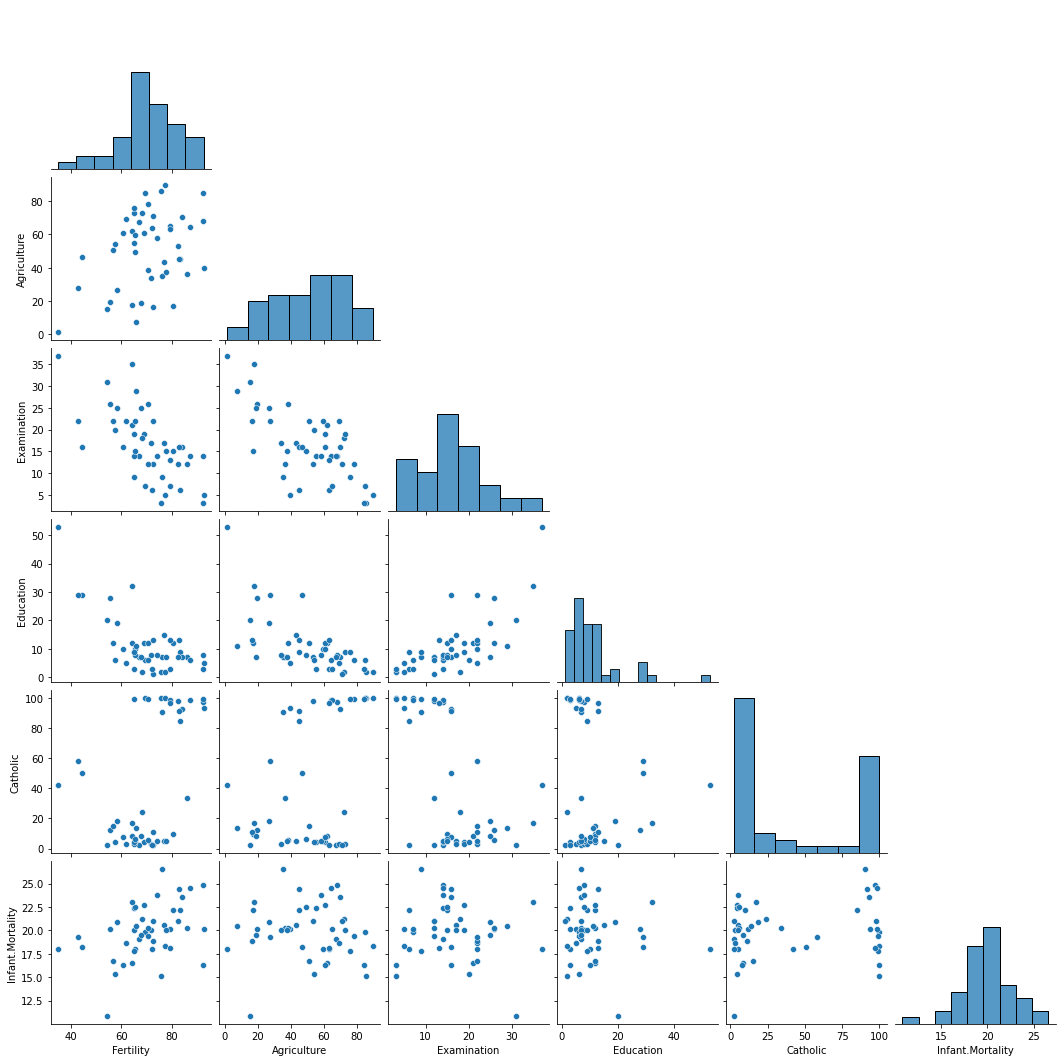

In [7]:
sns.pairplot(swiss, corner=True)
plt.show()

In [8]:
# fertility v examination
# agriculture v examination

H$_0$ : There is no linear relationship between fertility and examination

H$_a$ : There is a linear relationship between fertility and examination

In [12]:
fertility = swiss.Fertility
examination = swiss.Examination

In [15]:
r, p = stats.pearsonr(fertility, examination)

In [17]:
# confidence level: 0.95
# alpha: 0.05
α = 0.05

In [18]:
if p < α:
    print('We can reject the null hypothesis that there is no linear relationship between fertility and examination!')
    print(f'Our pearson\'s r value is {r}')
else:
    print('We failed to reject H0')

We can reject the null hypothesis that there is no linear relationship between fertility and examination!
Our pearson's r value is -0.6458827064572875


In [19]:
p

9.450437340690438e-07

H$_0$: There is no linear relationship between agriculture and examination

H$_a$: There is a linear relationship between agriculture and examination

In [20]:
# let's ensure that we keep a confidence level
# and apha set:
α = 0.05

In [21]:
r, p = stats.pearsonr(swiss.Agriculture,
                      swiss.Examination)

if p < α:
    print('We can reject the null hypothesis!')
    print(f'Our p value is {p} and our pearson r is {r}')
    print('We reject the idea that there is no linear relationship')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis!
Our p value is 9.951515271339796e-08 and our pearson r is -0.6865422086171364
We reject the idea that there is no linear relationship


## Chi-Squared Testing

In [23]:
mpg = data('mpg')

In [24]:
# when we want to se if there is independence between
# two categorical variables

In [25]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [27]:
mpg['auto_transmission'] = mpg.trans.str.startswith(
    'auto').astype(int)

In [29]:
# We will create a table of counted
# observed values to test for 
# the chi-squared statistic and associated p value

In [28]:
pd.crosstab(mpg['year'], mpg['auto_transmission'])

auto_transmission,0,1
year,,
1999,43,74
2008,34,83


In [30]:
observed = pd.crosstab(mpg['year'], mpg['auto_transmission'])

H$_0$: The variables of automatic transmission and year are independent of eachother

H$_a$: There is a relationship/dependency between vehicle manufacture year and vehicle transmission type

In [31]:
α

0.05

In [32]:
stats.chi2_contingency(observed)

(1.2388121432707422,
 0.2657001056392438,
 1,
 array([[38.5, 78.5],
        [38.5, 78.5]]))

In [34]:
mpg.year.value_counts(normalize=True)

1999    0.5
2008    0.5
Name: year, dtype: float64

In [ ]:
mpg.auto_transmission.value_counts(normalize=True)

1    0.67094
0    0.32906
Name: auto_transmission, dtype: float64

In [40]:
234 * .67 / 2

78.39

In [38]:
len(mpg)

234

In [37]:
mpg.shape

(234, 12)

The chi-squared statistic will calculate the difference* between the expected, totally independent version of the values versus what we actually observed.

 - We will feed in the observed values via a pd.crosstab() function call on our two series,
- When we call stats.chi_squared_contingency on our observed values, we will in turn get a return value associated with the anticpipated, completely independent, hypothetical value spread

In [41]:
chi2, \
p, \
degf, \
expected = stats.chi2_contingency(observed)

In [42]:
if p < α:
    print('We can reject our null hypothesis')
    print(f'We can say with a p value of {p} that this relationship is not totally independent')
    print(f'Our chi-squared statistic is {chi2}')
else:
    print('we fail to reject the null hypothesis')
    print('we cannot say that these two (year and automatic transmission) are not independent')

we fail to reject the null hypothesis
we cannot say that these two (year and automatic transmission) are not independent


In [43]:
p

0.2657001056392438